In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
test_sizes = [1,10,25,50,100,125,140,145,149]

In [65]:
def precision(sample,target_class=0):
    subset = np.where(sample[:,0]==target_class)[0]
    num_true = len(subset)
    num_false_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_true_positives = num_true - num_false_negatives
    # Uncomment to print the counts...
    # print(num_true,num_true_positives,num_false_negatives)
    
    subset = np.where(sample[:,0]!=target_class)[0]
    num_false = len(subset)
    num_true_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_false_positives = num_false - num_true_negatives
    # Uncomment to print the counts
    # print(num_false,num_false_positives,num_true_negatives)

    denom = num_true_positives + num_false_positives
    if denom > 0:
        return num_true_positives / denom
    else:
        return 0.0
    
def calc_precision(samples,target_class=0):
    return np.array([precision(x,target_class) for x in samples])

In [66]:
def recall(sample,target_class=0):
    subset = np.where(sample[:,0]==target_class)[0]
    num_true = len(subset)
    num_false_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_true_positives = num_true - num_false_negatives
    # Uncomment to print the counts...
    # print(num_true,num_true_positives,num_false_negatives)
    
    subset = np.where(sample[:,0]!=target_class)[0]
    num_false = len(subset)
    num_true_negatives = len(np.where(sample[subset,1]!=target_class)[0])
    num_false_positives = num_false - num_true_negatives
    # Uncomment to print the counts
    # print(num_false,num_false_positives,num_true_negatives)

    denom = num_true_positives + num_false_negatives
    if denom > 0:
        return num_true_positives / denom
    else:
        return 0.0

def calc_recall(samples,target_class=0):
    return np.array([recall(x,target_class) for x in samples])

In [126]:
chosen_class = 0

In [127]:
# Precision/recall
p = np.array([calc_precision(np.loadtxt("iris-results-%d.txt"%x).reshape((100,-1,2)),chosen_class) for x in test_sizes]).transpose()
r = np.array([calc_recall(np.loadtxt("iris-results-%d.txt"%x).reshape((100,-1,2)),chosen_class) for x in test_sizes]).transpose()

In [128]:
epsilon = 1e-8

In [129]:
p_means = np.mean(p,0)+epsilon
r_means = np.mean(r,0)+epsilon
p_stderr = (np.std(p,0)+epsilon)/np.sqrt(p.shape[0])
r_stderr = (np.std(r,0)+epsilon)/np.sqrt(r.shape[0])

In [130]:
# F-score - summary of balanced precision/recall
# (Harmonic mean of the Precision and Recall)
F = 2.0 * (p_means*r_means) / (p_means+r_means)
F_stderr = 2.0 * (p_stderr*r_stderr) / (p_stderr+r_stderr)

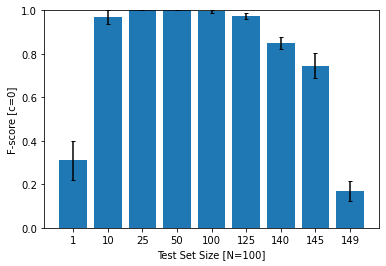

In [131]:
plt.bar([str(x) for x in test_sizes],F,yerr=1.96*F_stderr,capsize=2)
plt.ylim(0,1)
plt.ylabel("F-score [c=%d]"%(chosen_class))
plt.xlabel("Test Set Size [N=%d]"%(p.shape[0]))
plt.show()

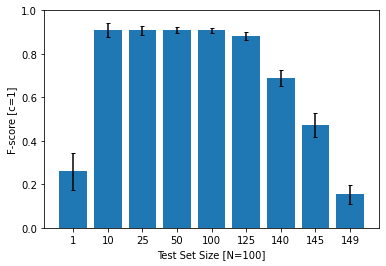

In [119]:
plt.bar([str(x) for x in test_sizes],F,yerr=1.96*F_stderr,capsize=2)
plt.ylim(0,1)
plt.ylabel("F-score [c=%d]"%(chosen_class))
plt.xlabel("Test Set Size [N=%d]"%(p.shape[0]))
plt.show()